# Implementing Neural Network in Python


In [0]:
import numpy as np

def deriv(f, x, epsilon=0.0001):
    return (f(x+epsilon) - f(x)) / epsilon

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(W_list, err_list):
    plt.figure()
    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.plot([i for i in range(epochs)], W_list, c="g")
    plt.title("Weight")

    plt.subplot(122)
    plt.plot([i for i in range(epochs)], err_list, c="g")
    plt.title("Error")

    plt.show()

## Step 1. The Forward and Backward Pass with one neurons

![1neuron](img/Diapositive1.jpeg)

### Forward Pass

In the forward pass, it is generally known that each input is multiplied by its associated weight and the products between all inputs and their weights are then summed. This is called the sum of products (*SOP*). For example, there are 2 inputs **X1** and **X2** and their weights are **W1** and **W2**, respectively, then the **SOP** will be **X1.W1+X2.W2**.

After calculating the SOP, next is to feed it to the activation function in the output layer neuron. Such a function helps to capture the non-linear relationships between the inputs and the outputs and thus increasing the accuracy of the network.

After calculating the predicted output, next step is to measure the error of prediction using an error function.

$$sop = X*W$$
$$predicted = activ(sop) = \frac{1}{1+e^{-sop}}$$
$$Error = J(predicted, target) = (predicted - target)^{2} = (\frac{1}{(1+e^{-X*W})} - target)^{2}$$

### Forward Pass in python

In [0]:
def initialize():
    X = 1
    W = 1
    target = 0
    return X, W, target

X, W, target = initialize()

In [0]:
def SOP(X, W):
    return W * X

In [0]:
def Activ(sop):
    return 1.0 / (1 + np.exp(-1 * sop))

In [0]:
def forward(X, W):
    return Activ(SOP(X, W))

predicted = forward(X, W)
predicted

0.7310585786300049

### Cost Function

In [0]:
def cost_function(predicted, target):
    return np.power(predicted - target, 2)

error = cost_function(predicted, target)
error

0.534446645388523

### Backward Pass

In the backward pass, we are looking to know how the error changes by changing the network weights. As a result, we want to build an equation in which both the error and the weight exist.

$$error = (predicted - target)^{2} = (\frac{1}{(1+e^{-X*W})} - target)^{2}$$

Using the equation below for calculating the gradient might be complex especially when more inputs and weights exist. As an alternative, we can use the chain rule which simplifies the calculations:

$$\frac{d error}{d W} = \frac{d error}{d predicted} * \frac{d predicted}{d sop} * \frac{d sop}{d W}$$

$$\frac{d error}{d predicted} = J'(predicted, target) = 2 * (predicted - target)$$

$$\frac{d predicted}{d sop} = Activ'(sop)$$

$$\frac{d sop}{d W} = (X*W)' = X$$

### Backward Pass in python

Define each element of the chain rule

In [0]:
def error_predicted_deriv(predicted, target):
    return 2 * (predicted - target)

def predicted_sop_deriv(sop):
    return deriv(Activ, sop)

def sop_w_deriv(X):
    return X

In [0]:
def backward(X, W, target):
    d_w = error_predicted_deriv(Activ(SOP(X, W)), target) * \
             predicted_sop_deriv(SOP(X, W)) * \
             sop_w_deriv(X)
    return d_w

backward(X, W, target)

0.28746303859415945

### Apply GD method to reach the minimum of the cost function

In [0]:
def update_w(w, grad, learning_rate):
    return w - learning_rate * grad

In [0]:
learning_rate = 0.005
X, W, target = initialize()

print("initial W:", W)

# Forward Pass
predicted = forward(X, W)
print("predicted:", predicted)

# Error
error = cost_function(predicted, target)
print("error    :", error)

# Backward Pass
grad = backward(X, W, target)
print("gradient :", grad)
new_W = update_w(W, grad, learning_rate)
print("new W    :", new_W)

initial W: 1
predicted: 0.7310585786300049
error    : 0.534446645388523
gradient : 0.28746303859415945
new W    : 0.9985626848070293


In [0]:
epochs = 100_000
learning_rate = 0.005
X, W, target = initialize()

def fit(X, W, learning_rate, epochs):
    W_list = []
    err_list = []
    for k in range(epochs):
        predicted = forward(X, W)
        error = cost_function(predicted, target)
        err_list += [error]
        grad = backward(X, W, target)
        W = update_w(W, grad, learning_rate)
        W_list += [W]
    return W_list, err_list

learning_rate = 0.01
W_list, err_list = fit(X, W, learning_rate, epochs)

<Figure size 432x288 with 0 Axes>

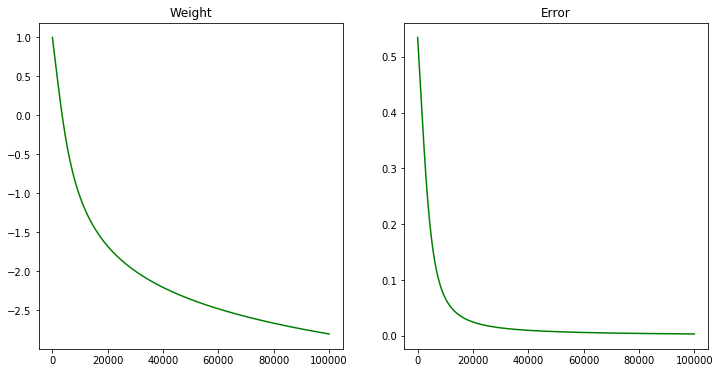

Correct learning rate


In [0]:
# Do the same with another learning rate
epochs = 100_000
learning_rate = 0.001
X, W, target = initialize()

W_list, err_list = fit(X, W, learning_rate, epochs)
plot(W_list, err_list)
print("Correct learning rate")